# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [ ]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
# Start the call counter
record = 1
x =1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")
#Loop through the cities in the city list
for city in cities:
    # Try statement to append calls where value is found
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try:
        response = requests.get(f"{url}&q={city}").json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} of set {x} | {city_record}")
        #print(f"{url}&q={city}")
        # Increase counter by one
        record= record + 1
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue
print("------------------------------\nData Retrieval Complete\n------------------------------")
print(response)

Beginning Data Retrieval
-------------------------------
Processing Record 1 of set 1 | Rikitea
Processing Record 2 of set 1 | Kavieng
Processing Record 3 of set 1 | Luderitz
Processing Record 4 of set 1 | Hermanus
Processing Record 5 of set 1 | Hobart
Processing Record 6 of set 1 | Afyonkarahisar
Processing Record 7 of set 1 | Kavaratti
Processing Record 8 of set 1 | Ushuaia
Processing Record 9 of set 1 | Puerto Ayora
City not found. Skipping...
Processing Record 10 of set 1 | Kruisfontein
Processing Record 11 of set 1 | Macapa
Processing Record 12 of set 1 | Victor Harbor
Processing Record 13 of set 1 | Avarua
Processing Record 14 of set 1 | Provideniya
Processing Record 15 of set 1 | Kapaa
Processing Record 16 of set 1 | Dareda
Processing Record 17 of set 1 | Busselton
Processing Record 18 of set 1 | Miri
Processing Record 19 of set 1 | Hithadhoo
Processing Record 20 of set 1 | Freeport
Processing Record 21 of set 1 | Marzuq
Processing Record 22 of set 1 | Oranjemund
Processing Reco

Processing Record 183 of set 1 | Trogir
Processing Record 184 of set 1 | Port Lincoln
Processing Record 185 of set 1 | Kibakwe
Processing Record 186 of set 1 | Tomatlan
Processing Record 187 of set 1 | Sao Joao da Barra
Processing Record 188 of set 1 | Tuatapere
Processing Record 189 of set 1 | Taoudenni
Processing Record 190 of set 1 | Solnechnyy
City not found. Skipping...
Processing Record 191 of set 1 | Bud
City not found. Skipping...
Processing Record 192 of set 1 | Saint George
Processing Record 193 of set 1 | Hun
Processing Record 194 of set 1 | Timbuktu
Processing Record 195 of set 1 | Teguldet
Processing Record 196 of set 1 | Yar-Sale
Processing Record 197 of set 1 | Nizhneudinsk
Processing Record 198 of set 1 | Anadyr
Processing Record 199 of set 1 | Mazagao
City not found. Skipping...
Processing Record 200 of set 1 | Ilulissat
Processing Record 201 of set 1 | Kurilsk
Processing Record 202 of set 1 | Neiafu
City not found. Skipping...
City not found. Skipping...
Processing Re

Processing Record 362 of set 1 | Besikduzu
Processing Record 363 of set 1 | Hobyo


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
weather_dict = {
    "City_ID": city_name,
    "Cloudiness":cloudiness,
    "Country":country,
    "Date":date,
    "Humidity": humidity,
    "Lat":lat,
    "Lng":lng,
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

In [11]:
weather_data = pd.DataFrame(weather_dict)
weather_data

,City_ID,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Tchaourou,30,BJ,1578336359,21,8.89,2.60,85.37,1.72
1,Albany,90,US,1578335668,74,42.65,-73.75,37.99,8.05
2,Ponta Delgada,75,PT,1578336144,93,37.73,-25.67,64.40,13.87
3,Gat,65,SN,1578336362,17,14.69,-16.54,84.20,6.93
4,Port Blair,0,IN,1578336116,80,11.67,92.75,80.71,16.13
...,...,...,...,...,...,...,...,...,...
241,Ribeira Grande,75,PT,1578336618,93,38.52,-28.70,64.40,14.99
242,Gulfport,1,US,1578336619,52,30.37,-89.09,71.60,6.93
243,College,75,US,1578336154,58,64.86,-147.80,-34.60,2.08
244,Leo,78,BF,1578336621,19,11.10,-2.10,81.75,2.42


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

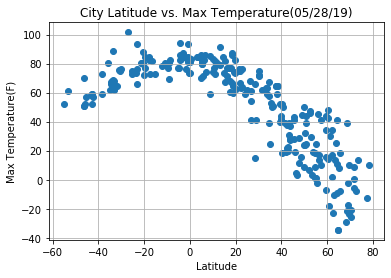

In [12]:
plt.scatter(weather_data["Lat"],weather_data["Max Temp"], marker= "o")
plt.title("City Latitude vs. Max Temperature(05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.grid(True)
plt.savefig("City Latitude vs. Max Temperature.png")
plt.show()

Analysis The graph is showing relationship between city latitude and max temperature.There is no dramatic increase from latitude -60 to 0, but it continously drops as latitude goes north. cities with highest max temperature are around latitude 0.

#### Latitude vs. Humidity Plot

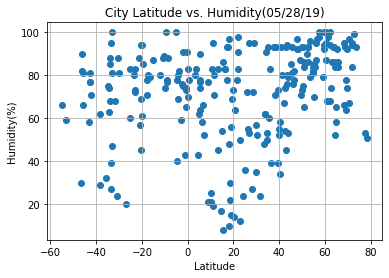

In [13]:
plt.scatter(weather_data["Lat"],weather_data["Humidity"], marker= "o")
plt.title("City Latitude vs. Humidity(05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid(True)
plt.savefig("City Latitude vs. Humidity.png")
plt.show()

Analysis The graph is showing relationship between city latitude and Humidity.Cities with highest max humidity are around latitude 60.

#### Latitude vs. Cloudiness Plot

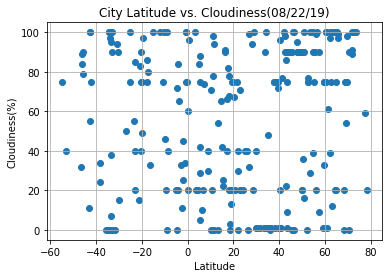

In [14]:
plt.scatter(weather_data["Lat"],weather_data["Cloudiness"], marker= "o")
plt.title("City Latitude vs. Cloudiness(08/22/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid(True)
plt.savefig("City Latitude vs. Cloudiness.png")
plt.show()

Analysis The graph is showing relationship between city latitude and Cloudiness.Cities with highest max cloudiness are between latitude 40 to 70.

#### Latitude vs. Wind Speed Plot

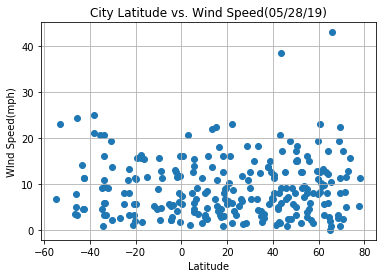

In [15]:
plt.scatter(weather_data["Lat"],weather_data["Wind Speed"], marker= "o")
plt.title("City Latitude vs. Wind Speed(05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("WInd Speed(mph)")
plt.grid(True)
plt.savefig("City Latitude vs. Wind Speed.png")
plt.show()

Analysis The graph is showing relationship between city latitude and Wind speed.Cities with highest max cloudiness are between latitude 40 to 70.

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [78]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8151657406810827


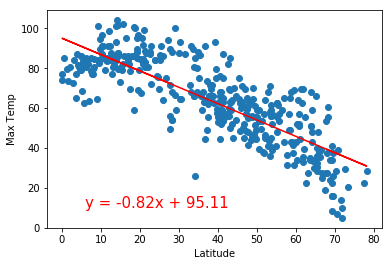

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.760263355051646


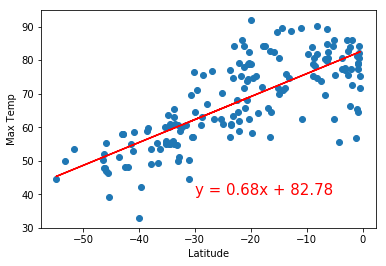

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10358336015746494


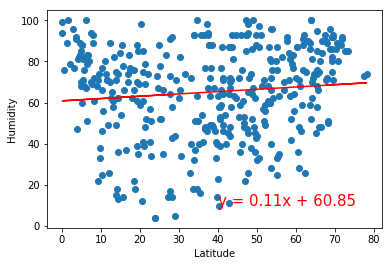

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14689473425583055


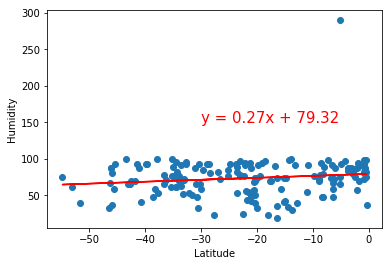

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08733547918934018


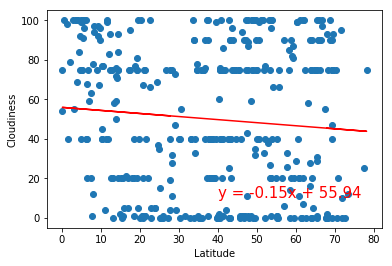

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21881426893991618


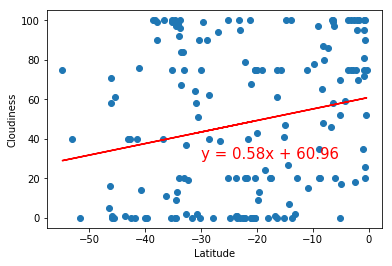

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1071382774388479


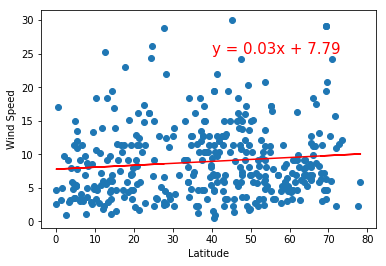

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.322483077139538


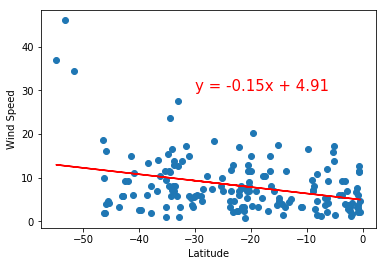